<a href="https://colab.research.google.com/github/RISHIKA-hub-929/CODSOFT-2/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving IMDb Movies India.csv to IMDb Movies India (1).csv


In [ ]:
df = pd.read_csv("/content/IMDb Movies India.csv", encoding_errors="ignore")


In [ ]:


# Display first few rows
print(df.head())


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                         #Homecoming -2021.0   90 min   Drama, Musical   
3                             #Yaaram -2019.0  110 min  Comedy, Romance   
4                   ...And Once Again -2010.0  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [ ]:
print(df.isnull().sum())


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
None


In [ ]:
df = df.drop(['ID', 'Movie_Description'], axis=1, errors='ignore')


In [ ]:
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)  # Fill missing genres with most common value


<ipython-input-12-98f5f704db89>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)  # Fill missing genres with most common value


In [ ]:
print(df.columns)


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces


In [ ]:
print(df.columns)


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [ ]:
print(df.head())


                                 Name    Year Duration  Genre  Rating  Votes  \
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min    229     7.0      8   
3                             #Yaaram -2019.0  110 min    184     4.4     35   
5                ...Aur Pyaar Ho Gaya -1997.0  147 min    157     4.7    827   
6                           ...Yahaan -2005.0  142 min    289     7.4  1,086   
8                  ?: A Question Mark -2012.0   82 min    320     5.6    326   

   Director          Actor 1                 Actor 2          Actor 3  
1       629     Rasika Dugal          Vivek Ghamande    Arvind Jangid  
3      1335          Prateik              Ishita Raj  Siddhant Kapoor  
5      1530       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
6      2044  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma  
8       135        Yash Dave          Muntazir Ahmad     Kiran Bhatia  


In [ ]:
X = df[['Genre', 'Director']]  # Remove 'Actors' if it's not available


In [ ]:
# Step 1: Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Step 5: Predict a New Movie Rating (Example)
sample_movie = np.array([[5, 2]])  # Adjust values based on dataset encoding
predicted_rating = model.predict(sample_movie)

print(f"\nPredicted Movie Rating: {predicted_rating[0]:.2f}")




Model Evaluation:
Mean Absolute Error: 1.11
Mean Squared Error: 1.83
R2 Score: 0.01

Predicted Movie Rating: 5.64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


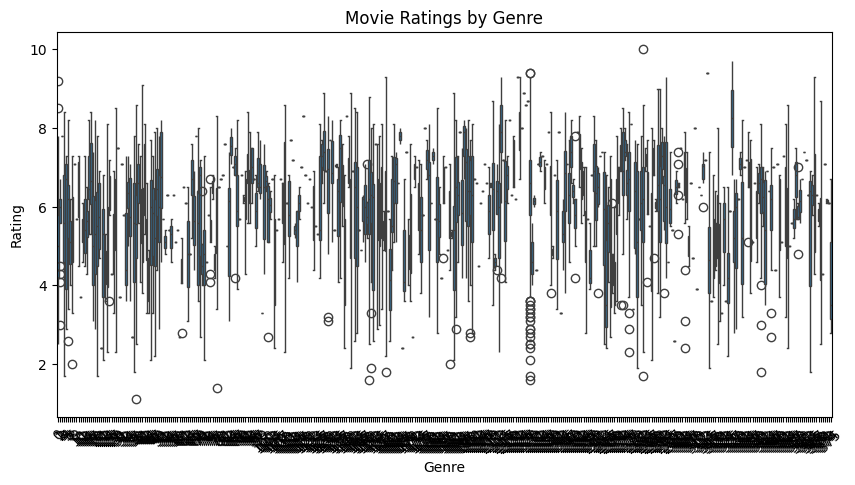

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Genre'], y=df['Rating'])
plt.xticks(rotation=45)
plt.title('Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()



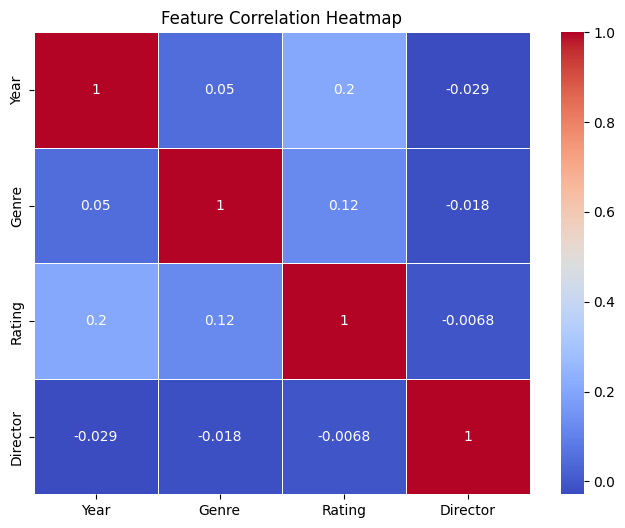

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()



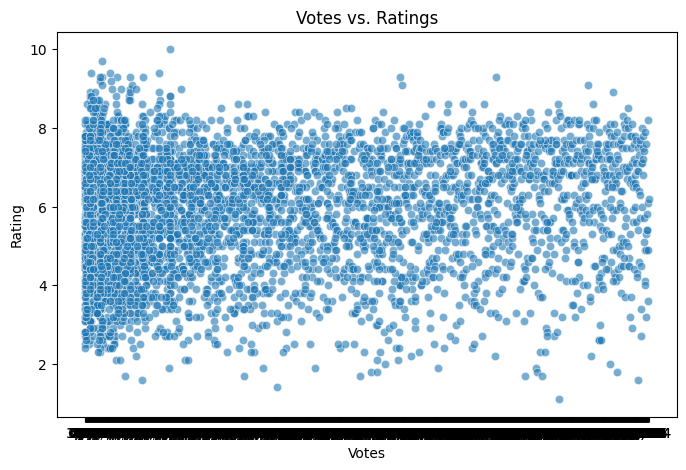

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Votes'], y=df['Rating'], alpha=0.6)
plt.title('Votes vs. Ratings')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

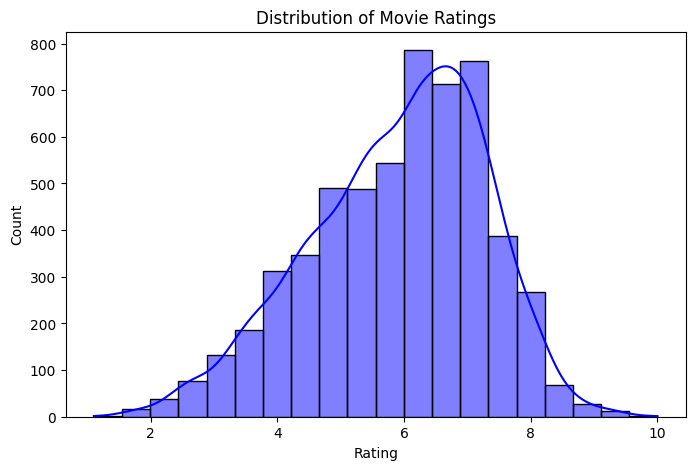

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Distribution of Movie Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()




